<a href="https://colab.research.google.com/github/data1002/lw_task_8/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import pytesseract

In [4]:
import imutils

In [7]:
from google.colab import files

In [8]:
uploaded=files.upload()

Saving NumberPlate_Swift.jpg to NumberPlate_Swift (3).jpg


In [14]:
img=cv2.imread('NumberPlate_Swift (3).jpg')

In [15]:
from google.colab.patches import cv2_imshow

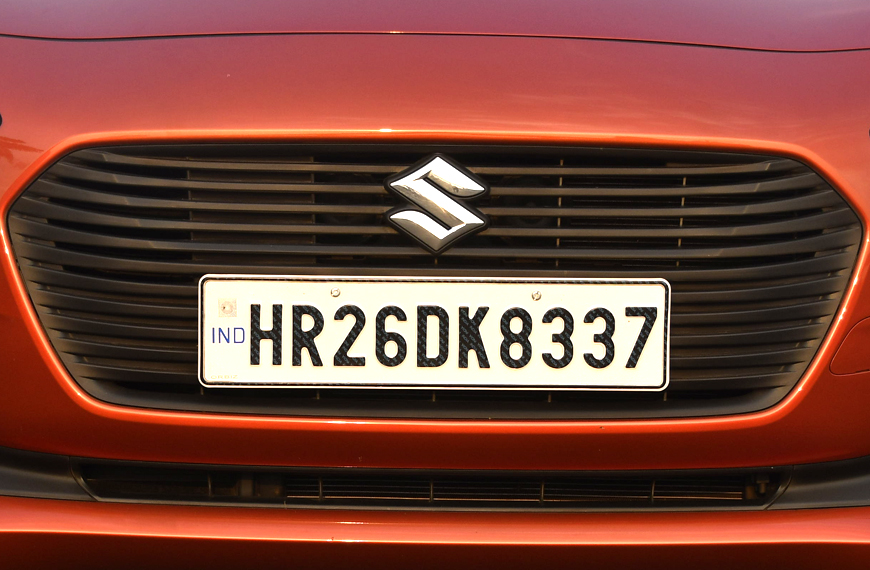

In [16]:
cv2_imshow(img)

In [17]:
img=cv2.resize(img,(620,480))

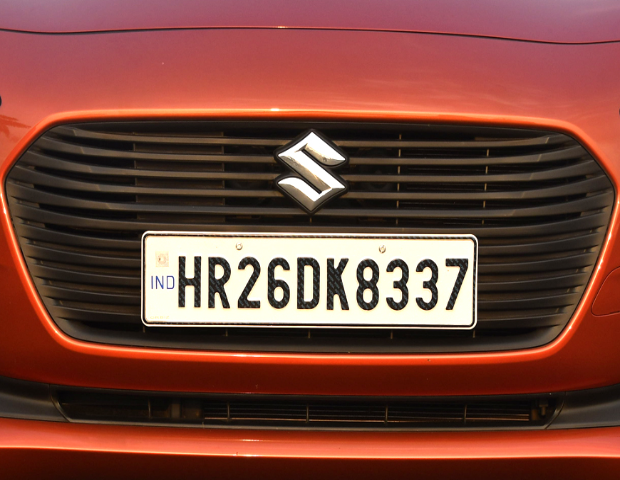

In [18]:
cv2_imshow(img)

In [19]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

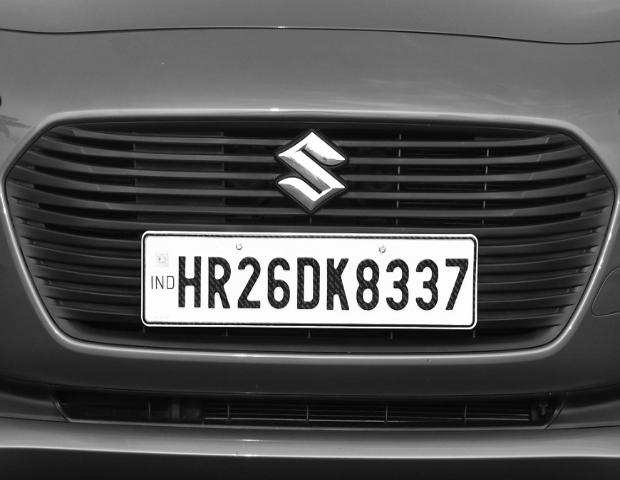

In [20]:
cv2_imshow(gray)

In [21]:
gray=cv2.bilateralFilter(gray,13,25,25)

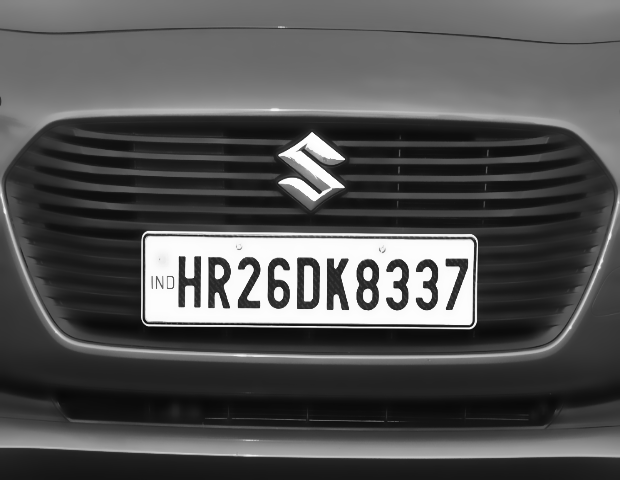

In [22]:
cv2_imshow(gray)

In [23]:
edged=cv2.Canny(gray,30,200)

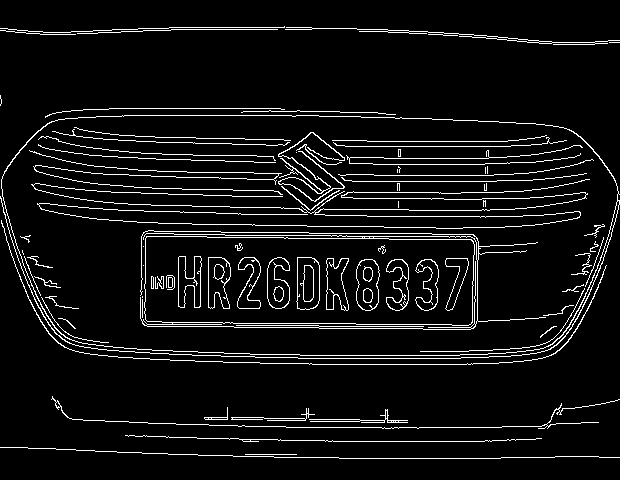

In [24]:
cv2_imshow(edged)

In [25]:
contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [26]:
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
    if len(approx) == 4:
        screenCnt = approx
        break

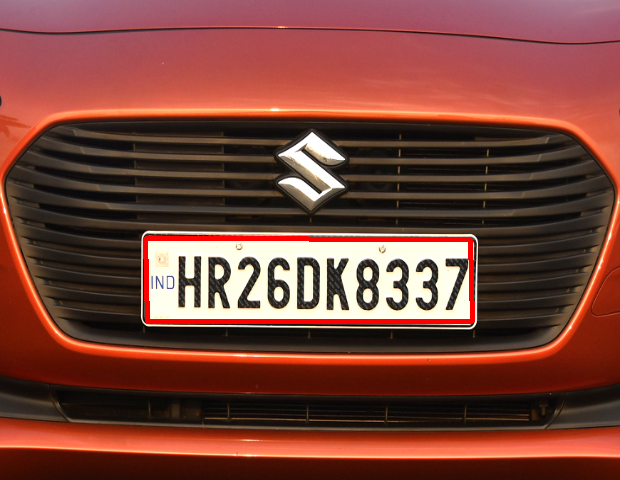

In [27]:
cv2_imshow(cv2.drawContours(img,[screenCnt],-1,(0,0,255),3))

In [28]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

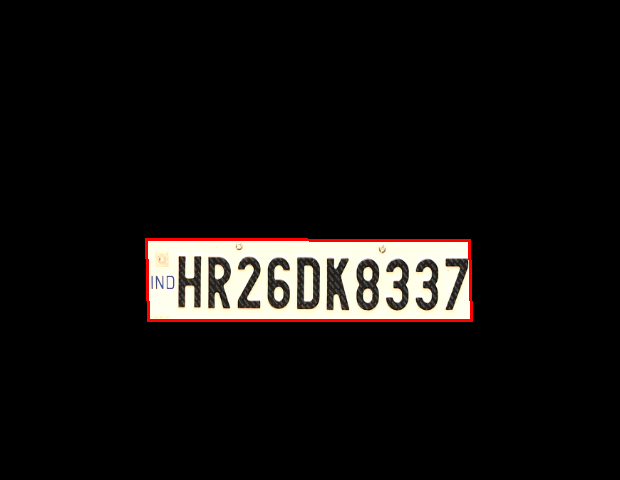

In [29]:
cv2_imshow(new_image)

In [30]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = gray[topx:bottomx+1, topy:bottomy+1]

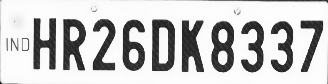

In [31]:
cv2_imshow(Cropped)

In [32]:
read=pytesseract.image_to_string(Cropped)

In [33]:
print(read)

~HR26DK8337



In [34]:
read=''.join(e for e in read if e.isalnum())

In [35]:
print(read)

HR26DK8337


In [36]:
#!pip install pytesseract

In [ ]:
#!sudo apt install tesseract-ocr